In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [3]:
print(data)

[ 54.96714153  48.61735699  56.47688538  65.23029856  47.65846625
  47.65863043  65.79212816  57.67434729  45.30525614  55.42560044
  45.36582307  45.34270246  52.41962272  30.86719755  32.75082167
  44.37712471  39.8716888   53.14247333  40.91975924  35.87696299
  64.65648769  47.742237    50.67528205  35.75251814  44.55617275
  51.1092259   38.49006423  53.75698018  43.9936131   47.0830625
  43.98293388  68.52278185  49.86502775  39.42289071  58.22544912
  37.7915635   52.08863595  30.40329876  36.71813951  51.96861236
  57.3846658   51.71368281  48.84351718  46.98896304  35.2147801
  42.80155792  45.39361229  60.57122226  53.4361829   32.36959845
  53.24083969  46.1491772   43.23078     56.11676289  60.30999522
  59.31280119  41.60782477  46.90787624  53.31263431  59.75545127
  45.20825762  48.14341023  38.93665026  38.03793376  58.12525822
  63.56240029  49.27989878  60.03532898  53.61636025  43.54880245
  53.61395606  65.38036566  49.64173961  65.64643656  23.80254896
  58.2190250

In [5]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


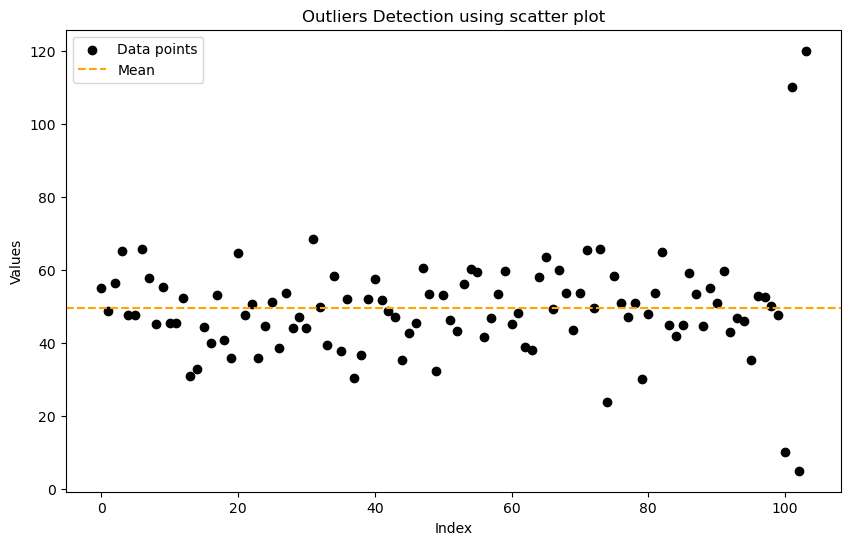

In [18]:
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(range(len(df)),df['Values'],color='black',label='Data points')
plt.axhline(y=df['Values'].mean(), color='orange',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Outliers Detection using scatter plot')
plt.legend()
plt.show()

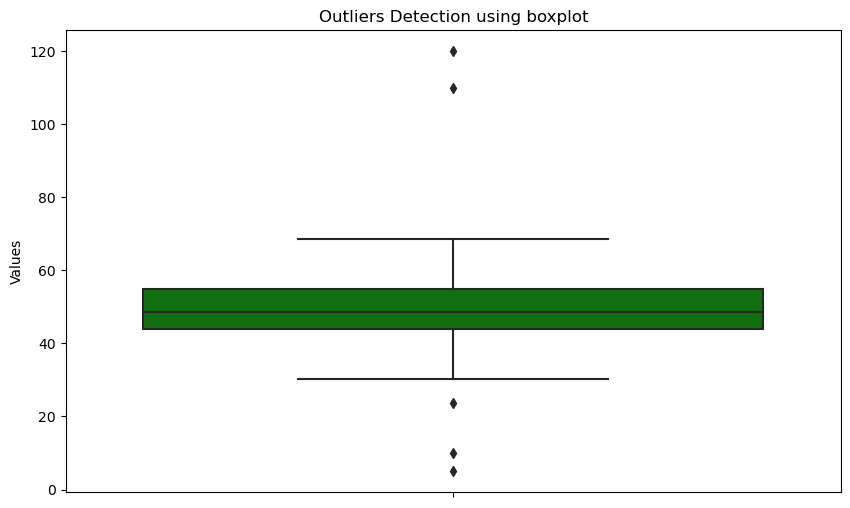

In [19]:
#box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Values',color='green')
plt.title('Outliers Detection using boxplot')
plt.show()

# Z Score Formula:


z = (X – μ) / σ

x= data point

μ=mean

σ=standard deviation


In [20]:
df['Z-Score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-Score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal' )
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-Score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


# InterQuartile Range(IQR) Method


The IQR formula is:

IQR=Q3-Q1

steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).

2.Compute IQR=Q3-Q1

3.Define lower & upper bounds:

        **Lower Bound=Q1-1.5xIQR**
        
        **Upper Bound=Q3+1.5xIQR**
        
4.Any value outside these bounds is an outlier.


In [21]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal' )
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-Score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


***Finding Outliers Using the IQR Method with a 5-Number Summary***

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 

***Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR***

In [26]:
#step 1 : create data

np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

#step 2 : 5 number summary

Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_val=np.min(data)
max_val=np.max(data)

#step 3

IQR=Q3-Q1

#step 4

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
 
#step 5 

outliers= data[(data<lower_bound )|( data>upper_bound)]

#Step6 : Result

print(f'5-Number Summary:\Min:{min_val},Q1: {Q1},Median (Q2): {Q2}, Q3: {Q3},Max: {max_val}')
print(f'IQR: {IQR}')
print(f'Lower Bound:{lower_bound},Upper Bound:{upper_bound}')
print(f'Outliers: {outliers}')

5-Number Summary:\Min:5.0,Q1: 43.874401021766715,Median (Q2): 48.73043708220287, Q3: 55.00852473036764,Max: 120.0
IQR: 11.134123708600924
Lower Bound:27.17321545886533,Upper Bound:71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]


***Down Sampling:Classification of task where class labels are imbalanced and we want to downsample the majority class to balance***

In [30]:
import pandas as pd 
from sklearn.utils import resample
df=pd.DataFrame({
    'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income':[2000,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'Class':['High','Low','Low','High','High','Low','High','High','Low','Low','High','High','Low']
})
df


,Age,Income,Class
0,22,2000,High
1,25,2500,Low
2,27,2700,Low
3,28,3200,High
4,30,3500,High
5,35,3800,Low
6,40,4000,High
7,45,4200,High
8,50,4300,Low
9,55,4500,Low


In [31]:
df_high=df[df['Class']=='High']
df_low=df[df['Class']=='Low']

In [53]:
df_high_downsampled=resample(df_high,replace=False,n_samples=len(df_low),random_state=42)

In [54]:
df_bal=pd.concat([df_high_downsampled,df_low])

In [55]:
df_bal

,Age,Income,Class
0,22,2000,High
3,28,3200,High
10,60,5000,High
4,30,3500,High
7,45,4200,High
6,40,4000,High
1,25,2500,Low
2,27,2700,Low
5,35,3800,Low
8,50,4300,Low


In [47]:
df_bal['Class'].value_counts()

Class
High    6
Low     6
Name: count, dtype: int64

***UpSampling:Classification of task where class labels are imbalanced and we want to upsample the minority class to balance***

In [49]:
df_low_upsampled=resample(df_low,replace=True,n_samples=len(df_high),random_state=42)
df_bal=pd.concat([df_low_upsampled,df_high])

In [50]:
df_bal

,Age,Income,Class
8,50,4300,Low
9,55,4500,Low
5,35,3800,Low
9,55,4500,Low
9,55,4500,Low
2,27,2700,Low
5,35,3800,Low
0,22,2000,High
3,28,3200,High
4,30,3500,High


In [52]:
 df_bal['Class'].value_counts()

Class
Low     7
High    7
Name: count, dtype: int64

# SMOTE(Synthetic Minority Over-Sampling Technique)

1.SMOTE to generate synthetic samples instead of duplicating existing ones

2.Convert categorical class labels into numeric form for SMOTE to work

3.Apply SMOTE to balance the dataset 

4.Convert back to original categorical values

5.Combine the resampled data into final balanced dataset


In [65]:
!pip install imblearn


In [66]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [78]:
!pip uninstall scikit-learn imbalanced-learn -y
 
 

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0


In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [85]:
!pip install imblearn

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
sm_df = pd.DataFrame({
   'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
   'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
   'Class': ['min', 'maj', 'maj', 'maj', 'maj', 'min', 'min', 'min', 'maj', 'maj', 'maj', 'maj', 'maj']
})

sm_df['Class'] = sm_df['Class'].map({'min': 0, 'maj': 1})

# Separate the features (X) and target (y)
X = sm_df[['Age', 'Income']]  # Features
y = sm_df['Class']            # Target

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

# Apply SMOTE to resample the data
X_sampled, y_sampled = smote.fit_resample(X, y)

# Map the resampled y values back to 'min' and 'maj'
y_sampled = y_sampled.map({0: 'min', 1: 'maj'})

# Concatenate the resampled features and target back into a DataFrame
df_balanced = pd.concat([pd.DataFrame(X_sampled, columns=['Age', 'Income']), pd.DataFrame(y_sampled, columns=['Class'])], axis=1)

# Print the class distribution after SMOTE
print(df_balanced['Class'].value_counts())

# Print the balanced DataFrame
print(df_balanced)

Class
min    9
maj    9
Name: count, dtype: int64
    Age  Income Class
0    22    2000   min
1    25    2500   maj
2    27    2700   maj
3    28    3200   maj
4    30    3500   maj
5    35    3800   min
6    40    4000   min
7    45    4200   min
8    50    4300   maj
9    55    4500   maj
10   60    5000   maj
11   65    5500   maj
12   70    6000   maj
13   40    4031   min
14   35    3831   min
15   44    4176   min
16   35    3826   min
17   41    4040   min
